In [1]:
from sklearn.datasets import load_wine 
wine = load_wine()

X = wine.data 
y = wine.target 

feature_names = wine.feature_names

print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [2]:
import numpy as np 
np.unique(y)

array([0, 1, 2])

In [3]:
feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selected_features = SelectKBest(score_func=chi2,k=6) 

selected_features.fit(X,y)

SelectKBest(k=6, score_func=<function chi2 at 0x7f87217abac0>)

In [7]:
max(selected_features.scores_) - min(selected_features.scores_)

16539.32376445507

<BarContainer object of 13 artists>

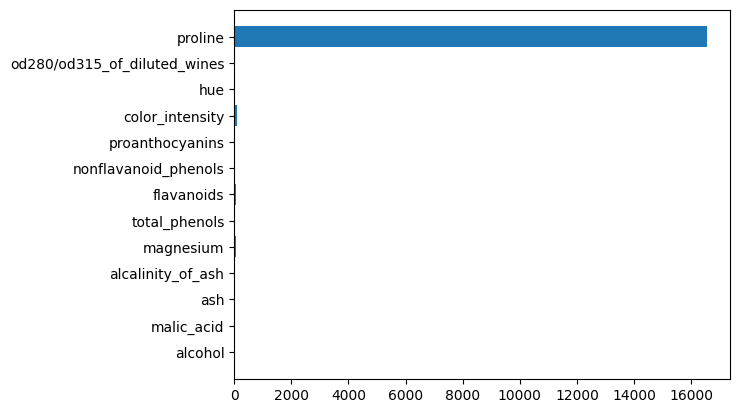

In [14]:
import matplotlib.pyplot as plt
import pandas as pd 
score = pd.DataFrame([selected_features.scores_[i] for i in range(len(feature_names))],index=feature_names)
plt.barh(score.index,score[0])

In [18]:
import pandas as pd 
temp = pd.DataFrame(X,columns=feature_names)

temp.drop(['nonflavanoid_phenols','proanthocyanins'],axis=1)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,9.30,0.60,1.62,840.0


In [20]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(X,y)



DecisionTreeClassifier(criterion='entropy')

In [21]:
model.feature_importances_

array([0.01412373, 0.        , 0.        , 0.02525179, 0.        ,
       0.        , 0.41284534, 0.        , 0.        , 0.22278576,
       0.01163563, 0.        , 0.31335775])